In [1]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="darkgrid")

In [2]:
def bic_stats(df):
    print("Inferred BIC better or equal: " + str(len(df[df['bic_inferred'] <= df['bic_true']])))
    print("Inferred BIC worse: " + str(len(df[df['bic_inferred'] > df['bic_true']])))
    df['bic_diff'].plot.hist(bins=100, alpha=0.5, title='(bic_true - bic_inferred) / bic_true\n value >0 means inferred BIC was better')
    
def logl_stats(df):
    print("Inferred loglh better or equal: " + str(len(df[df['logl_inferred'] >= df['logl_true']])))
    print("Inferred loglh worse: " + str(len(df[df['logl_inferred'] < df['logl_true']])))
    df['logl_diff'].plot.hist(bins=100, alpha=0.5, title='(logl_true - logl_inferred) / logl_true\n value <0 means inferred logl was better')
    
def reticulation_stats(df):
    print("Inferred n_reticulations less: " + str(len(df[df['n_reticulations_inferred'] < df['n_reticulations']])))
    print("Inferred n_reticulations equal: " + str(len(df[df['n_reticulations_inferred'] == df['n_reticulations']])))
    print("Inferred n_reticulations more: " + str(len(df[df['n_reticulations_inferred'] > df['n_reticulations']])))

def weirdness_stats(df):
    df['true_network_weirdness'].plot.hist(bins=10, alpha=0.5, range=(0,1), title='True network weirdness')
    
def zero_branches_stats(df):
    df['near_zero_branches_raxml'].plot.hist(bins=10, alpha=0.5, title='Near-zero branches raxml')
    
def distances(df):
    fig, axes = plt.subplots(3, 2, constrained_layout=True)
    df['hardwired_cluster_distance'].plot.hist(bins=10, alpha=0.5, title='Hardwired cluster distance', ax=axes[0,0])
    df['softwired_cluster_distance'].plot.hist(bins=10, alpha=0.5, title='Softwired cluster distance', ax=axes[0,1])
    df['displayed_trees_distance'].plot.hist(bins=10, alpha=0.5, title='Displayed trees distance', ax=axes[1,0])
    df['tripartition_distance'].plot.hist(bins=10, alpha=0.5, title='Tripartition distance', ax=axes[1,1])
    df['nested_labels_distance'].plot.hist(bins=10, alpha=0.5, title='Nested labels distance', ax=axes[2,0])
    df['path_multiplicity_distance'].plot.hist(bins=10, alpha=0.5, title='Path multiplicity distance', ax=axes[2,1])
    
def build_stats(df):
    plt.figure(0)
    bic_stats(df)
    print("")
    plt.figure(1)
    logl_stats(df)
    print("")
    plt.figure(2)
    reticulation_stats(df)
    print("")
    plt.figure(3)
    weirdness_stats(df)
    print("")
    plt.figure(4)
    zero_branches_stats(df)
    print("")
    plt.figure(5)
    distances(df)

Load the result CSV:

In [3]:
#df = pd.read_csv('small_network_results.csv')
#df = pd.read_csv('medium_network_norandom_results.csv')
#df = pd.read_csv('small_network_uniform_results.csv')
#df = pd.read_csv('medium_network_norandom_uniform_results.csv')
df = pd.read_csv('small_network_uniform_larger_msa_results.csv')

df['bic_diff'] = (df['bic_true'] - df['bic_inferred']) / df['bic_true']
df['logl_diff'] = (df['logl_true'] - df['logl_inferred']) / df['logl_true']

In [4]:
pd.set_option('display.max_columns', None)
df.head()

,name,n_taxa,n_trees,n_reticulations,msa_size,sampling_type,simulation_type,celine_params,seqgen_params,near_zero_branches_raxml,n_equal_tree_pairs,true_network_weirdness,true_network_path,inferred_network_path,likelihood_type,brlen_linkage_type,start_type,timeout,n_random_start_networks,n_parsimony_start_networks,runtime_inference,n_reticulations_inferred,bic_true,logl_true,bic_inferred,logl_inferred,bic_raxml,logl_raxml,rf_absolute_raxml,rf_relative_raxml,rf_absolute_inferred,rf_relative_inferred,hardwired_cluster_distance,softwired_cluster_distance,displayed_trees_distance,tripartition_distance,nested_labels_distance,path_multiplicity_distance,bic_diff,logl_diff
0,datasets_small_network_uniform_larger_msa_0_0/...,4,2,1,100,PERFECT_SAMPLING,CELINE,{'to': 0.11997105387258533| 'lambda': 18.95211...,-mHKY -t3.0 -f0.3|0.2|0.2|0.3,1,1,1.0,datasets_small_network_uniform_larger_msa_0_0/...,datasets_small_network_uniform_larger_msa_0_0/...,AVERAGE,LINKED,FROM_RAXML,0,0,0,55.359,0.0,544.329232,-188.284112,520.394105,-188.299478,520.490503,-188.347677,-1,-1,-1,-1,1.0,1.0,1.0,1.5,3.0,2.0,0.043972,-0.000082
1,datasets_small_network_uniform_larger_msa_0_0/...,4,2,1,100,PERFECT_SAMPLING,CELINE,{'to': 0.11997105387258533| 'lambda': 18.95211...,-mHKY -t3.0 -f0.3|0.2|0.2|0.3,1,1,1.0,datasets_small_network_uniform_larger_msa_0_0/...,datasets_small_network_uniform_larger_msa_0_0/...,AVERAGE,LINKED,RANDOM,0,5,5,330.408,0.0,544.329232,-188.284112,520.372479,-188.288665,520.490503,-188.347677,-1,-1,-1,-1,1.0,1.0,1.0,1.5,3.0,2.0,0.044012,-0.000024
2,datasets_small_network_uniform_larger_msa_0_0/...,4,2,1,100,PERFECT_SAMPLING,CELINE,{'to': 0.11997105387258533| 'lambda': 18.95211...,-mHKY -t3.0 -f0.3|0.2|0.2|0.3,1,1,1.0,datasets_small_network_uniform_larger_msa_0_0/...,datasets_small_network_uniform_larger_msa_0_0/...,BEST,LINKED,FROM_RAXML,0,0,0,7.546,0.0,544.253028,-188.246010,520.394105,-188.299478,520.490503,-188.347677,-1,-1,-1,-1,1.0,1.0,1.0,1.5,3.0,2.0,0.043838,-0.000284
3,datasets_small_network_uniform_larger_msa_0_0/...,4,2,1,100,PERFECT_SAMPLING,CELINE,{'to': 0.11997105387258533| 'lambda': 18.95211...,-mHKY -t3.0 -f0.3|0.2|0.2|0.3,1,1,1.0,datasets_small_network_uniform_larger_msa_0_0/...,datasets_small_network_uniform_larger_msa_0_0/...,BEST,LINKED,RANDOM,0,5,5,119.653,0.0,544.253028,-188.246010,520.372479,-188.288665,520.490503,-188.347677,-1,-1,-1,-1,1.0,1.0,1.0,1.5,3.0,2.0,0.043878,-0.000227
4,datasets_small_network_uniform_larger_msa_0_0/...,4,2,1,800,PERFECT_SAMPLING,CELINE,{'to': 0.11997105387258533| 'lambda': 18.95211...,-mHKY -t3.0 -f0.3|0.2|0.2|0.3,1,1,1.0,datasets_small_network_uniform_larger_msa_0_0/...,datasets_small_network_uniform_larger_msa_0_0/...,AVERAGE,LINKED,FROM_RAXML,0,0,0,49.602,0.0,3817.005593,-1795.510111,3784.706290,-1795.502272,3784.706290,-1795.502272,-1,-1,-1,-1,1.0,1.0,1.0,1.5,3.0,2.0,0.008462,0.000004


In [5]:
df.columns

Index(['name', 'n_taxa', 'n_trees', 'n_reticulations', 'msa_size',
       'sampling_type', 'simulation_type', 'celine_params', 'seqgen_params',
       'near_zero_branches_raxml', 'n_equal_tree_pairs',
       'true_network_weirdness', 'true_network_path', 'inferred_network_path',
       'likelihood_type', 'brlen_linkage_type', 'start_type', 'timeout',
       'n_random_start_networks', 'n_parsimony_start_networks',
       'runtime_inference', 'n_reticulations_inferred', 'bic_true',
       'logl_true', 'bic_inferred', 'logl_inferred', 'bic_raxml', 'logl_raxml',
       'rf_absolute_raxml', 'rf_relative_raxml', 'rf_absolute_inferred',
       'rf_relative_inferred', 'hardwired_cluster_distance',
       'softwired_cluster_distance', 'displayed_trees_distance',
       'tripartition_distance', 'nested_labels_distance',
       'path_multiplicity_distance', 'bic_diff', 'logl_diff'],
      dtype='object')

Inferred BIC better or equal: 929
Inferred BIC worse: 95

Inferred loglh better or equal: 454
Inferred loglh worse: 570

Inferred n_reticulations less: 734
Inferred n_reticulations equal: 283
Inferred n_reticulations more: 7





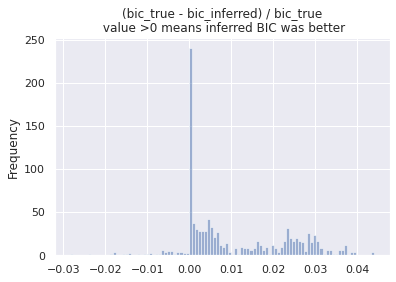

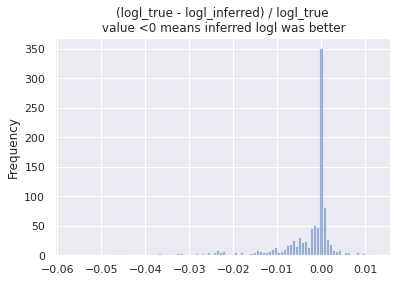

<Figure size 432x288 with 0 Axes>

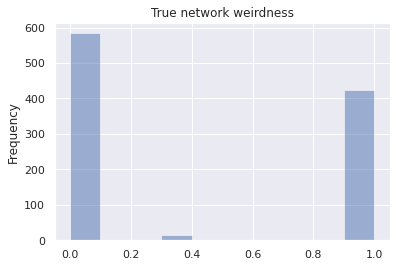

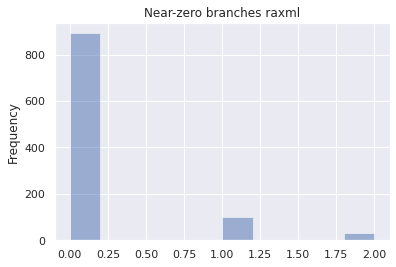

<Figure size 432x288 with 0 Axes>

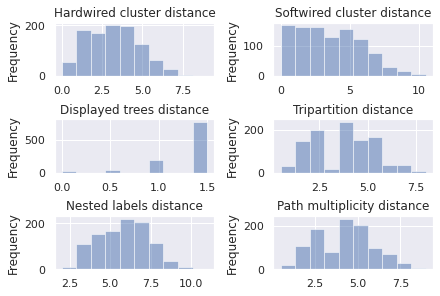

In [6]:
build_stats(df)

# Plots for starting with raxml-ng best tree only

Inferred BIC better or equal: 432
Inferred BIC worse: 80

Inferred loglh better or equal: 195
Inferred loglh worse: 317

Inferred n_reticulations less: 384
Inferred n_reticulations equal: 122
Inferred n_reticulations more: 6





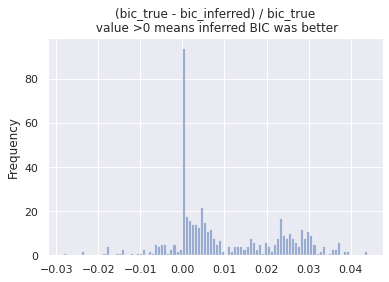

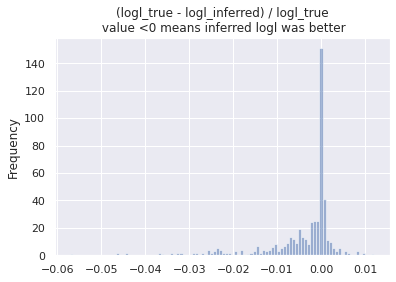

<Figure size 432x288 with 0 Axes>

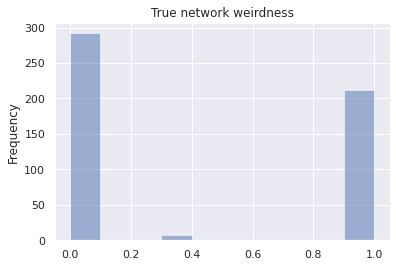

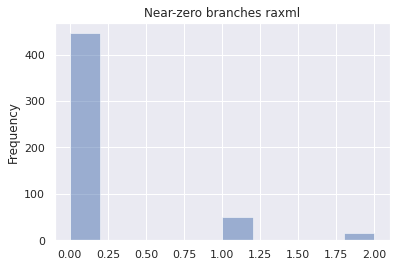

<Figure size 432x288 with 0 Axes>

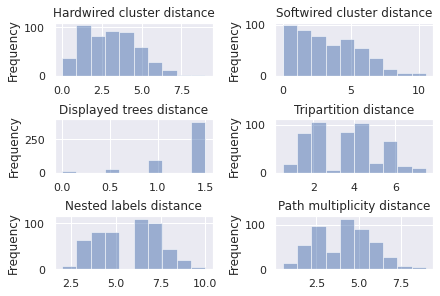

In [7]:
df_raxml_only = df.query('start_type == "FROM_RAXML"')
build_stats(df_raxml_only)

## Plots for MSA_size ~ 100*n_trees

Inferred BIC better or equal: 238
Inferred BIC worse: 14

Inferred loglh better or equal: 85
Inferred loglh worse: 167

Inferred n_reticulations less: 231
Inferred n_reticulations equal: 21
Inferred n_reticulations more: 0





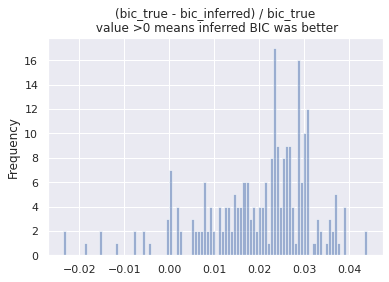

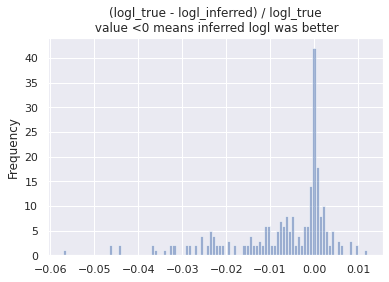

<Figure size 432x288 with 0 Axes>

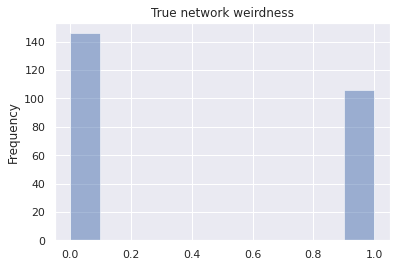

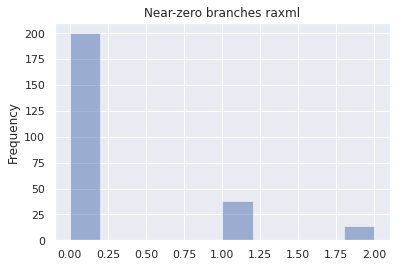

<Figure size 432x288 with 0 Axes>

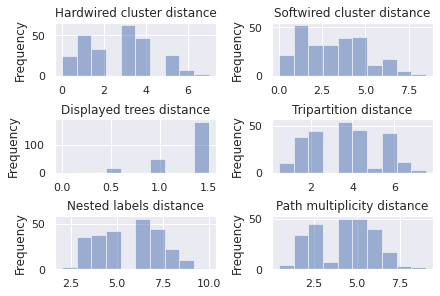

In [8]:
df_raxml_only_msasize_100 = df_raxml_only.query('(msa_size == 100) | (msa_size == 101)')
build_stats(df_raxml_only_msasize_100)

### Plots for LikelihodType.AVERAGE

Inferred BIC better or equal: 120
Inferred BIC worse: 6

Inferred loglh better or equal: 40
Inferred loglh worse: 86

Inferred n_reticulations less: 114
Inferred n_reticulations equal: 12
Inferred n_reticulations more: 0





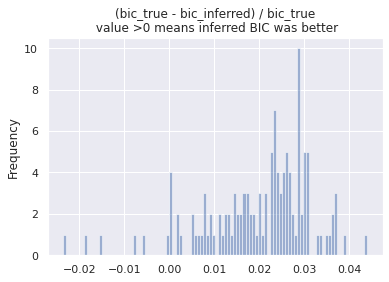

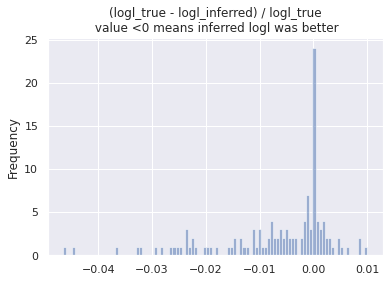

<Figure size 432x288 with 0 Axes>

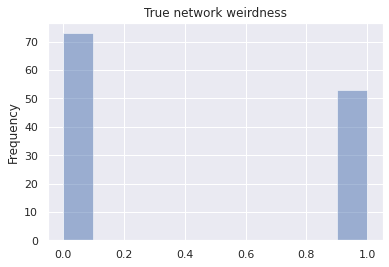

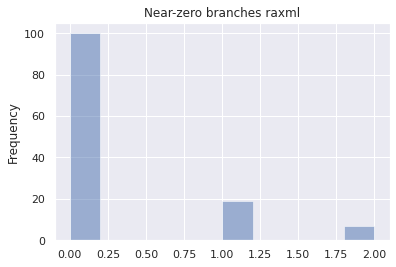

<Figure size 432x288 with 0 Axes>

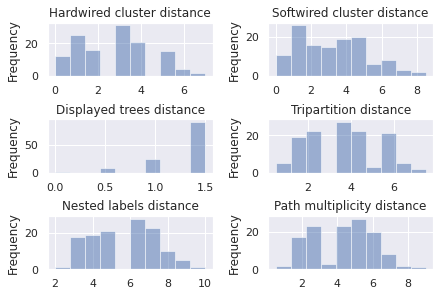

In [9]:
df_raxml_only_msasize_100_average = df_raxml_only_msasize_100.query('likelihood_type == "AVERAGE"')
build_stats(df_raxml_only_msasize_100_average)

### Plots for LikelihoodType.BEST

Inferred BIC better or equal: 118
Inferred BIC worse: 8

Inferred loglh better or equal: 45
Inferred loglh worse: 81

Inferred n_reticulations less: 117
Inferred n_reticulations equal: 9
Inferred n_reticulations more: 0





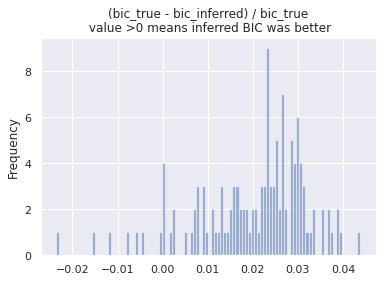

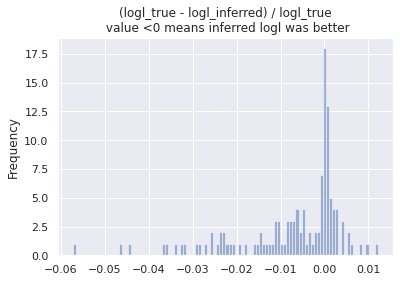

<Figure size 432x288 with 0 Axes>

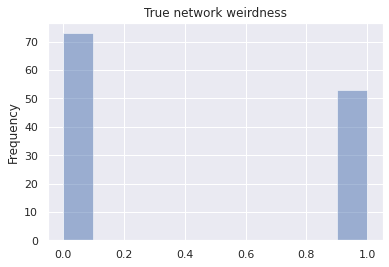

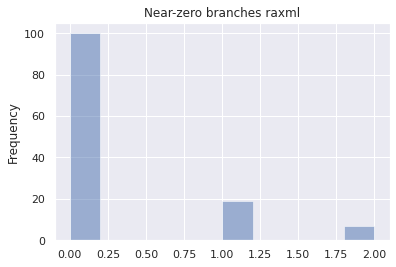

<Figure size 432x288 with 0 Axes>

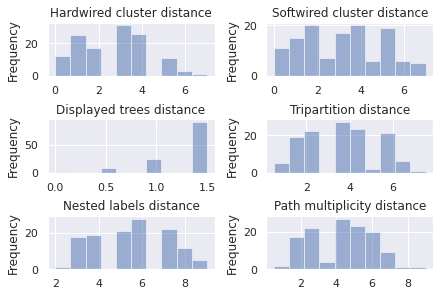

In [10]:
df_raxml_only_msasize_100_best = df_raxml_only_msasize_100.query('likelihood_type == "BEST"')
build_stats(df_raxml_only_msasize_100_best)

## Plots for MSA_size ~ 200*n_trees

Inferred BIC better or equal: 4
Inferred BIC worse: 0

Inferred loglh better or equal: 1
Inferred loglh worse: 3

Inferred n_reticulations less: 4
Inferred n_reticulations equal: 0
Inferred n_reticulations more: 0





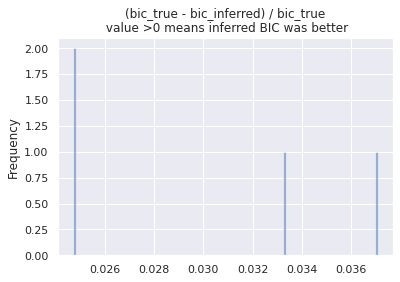

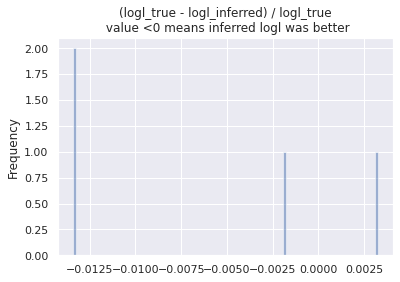

<Figure size 432x288 with 0 Axes>

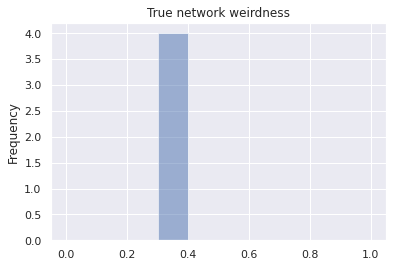

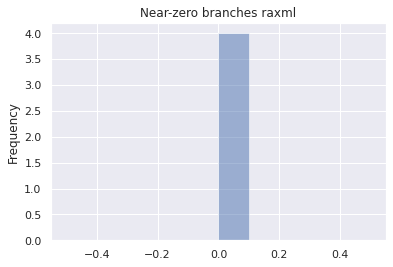

<Figure size 432x288 with 0 Axes>

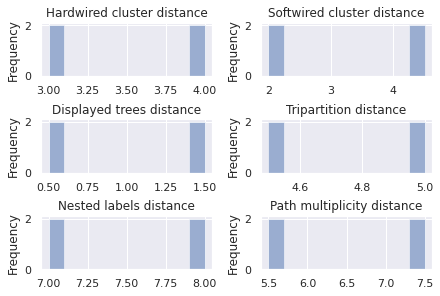

In [11]:
df_raxml_only_msasize_200 = df_raxml_only.query('(msa_size == 200) | (msa_size == 201)')
build_stats(df_raxml_only_msasize_200)

### Plots for LikelihodType.AVERAGE

Inferred BIC better or equal: 2
Inferred BIC worse: 0

Inferred loglh better or equal: 0
Inferred loglh worse: 2

Inferred n_reticulations less: 2
Inferred n_reticulations equal: 0
Inferred n_reticulations more: 0





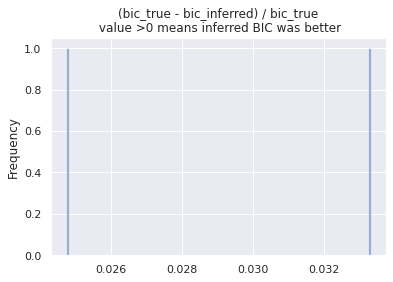

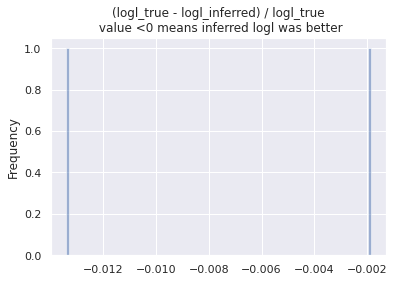

<Figure size 432x288 with 0 Axes>

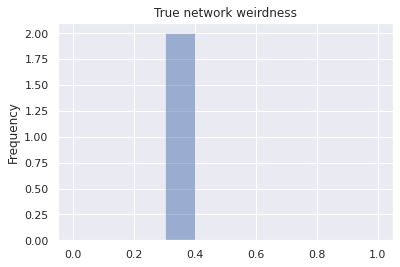

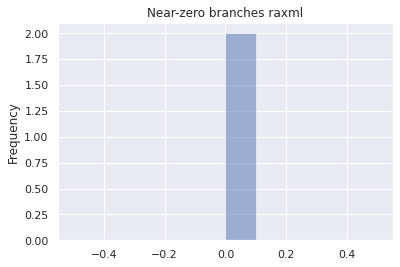

<Figure size 432x288 with 0 Axes>

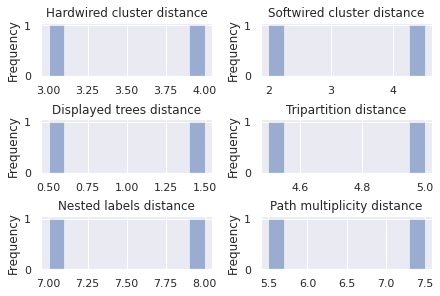

In [12]:
df_raxml_only_msasize_200_average = df_raxml_only_msasize_200.query('likelihood_type == "AVERAGE"')
build_stats(df_raxml_only_msasize_200_average)

### Plots for LikelihoodType.BEST

Inferred BIC better or equal: 2
Inferred BIC worse: 0

Inferred loglh better or equal: 1
Inferred loglh worse: 1

Inferred n_reticulations less: 2
Inferred n_reticulations equal: 0
Inferred n_reticulations more: 0





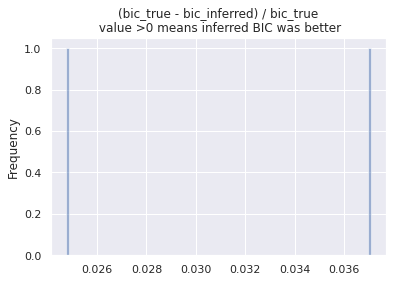

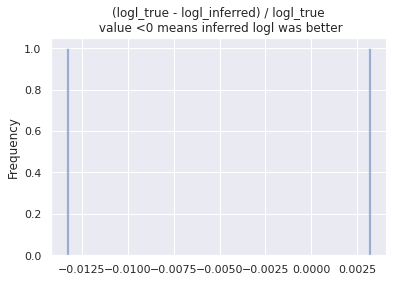

<Figure size 432x288 with 0 Axes>

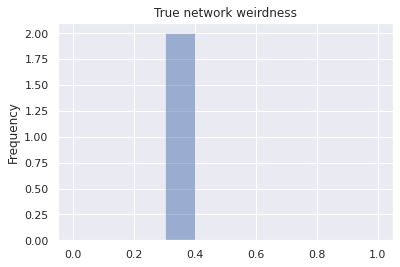

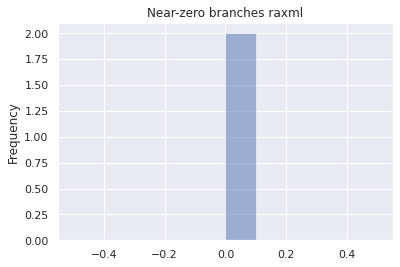

<Figure size 432x288 with 0 Axes>

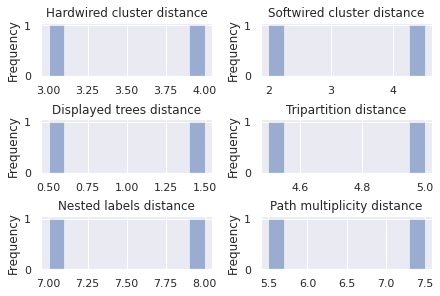

In [13]:
df_raxml_only_msasize_200_best = df_raxml_only_msasize_200.query('likelihood_type == "BEST"')
build_stats(df_raxml_only_msasize_200_best)

# Plots for starting with 5 random, 5 parsimony trees

Inferred BIC better or equal: 497
Inferred BIC worse: 15

Inferred loglh better or equal: 259
Inferred loglh worse: 253

Inferred n_reticulations less: 350
Inferred n_reticulations equal: 161
Inferred n_reticulations more: 1





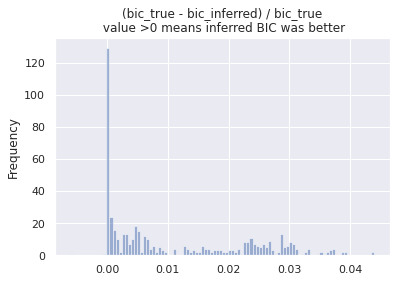

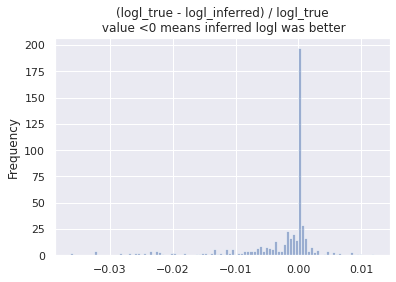

<Figure size 432x288 with 0 Axes>

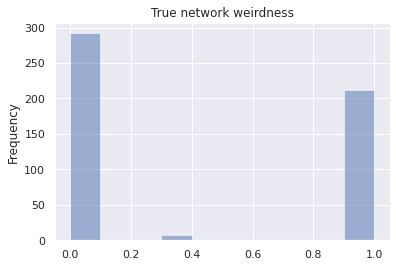

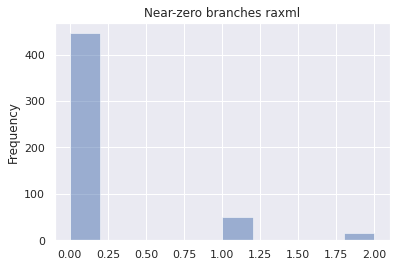

<Figure size 432x288 with 0 Axes>

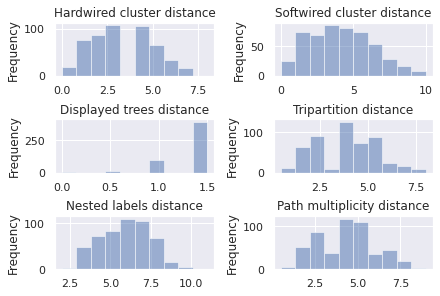

In [14]:
df_random = df.query('start_type == "RANDOM"')
build_stats(df_random)

## Plots for MSA_size ~ 100*n_trees

Inferred BIC better or equal: 251
Inferred BIC worse: 1

Inferred loglh better or equal: 96
Inferred loglh worse: 156

Inferred n_reticulations less: 224
Inferred n_reticulations equal: 28
Inferred n_reticulations more: 0





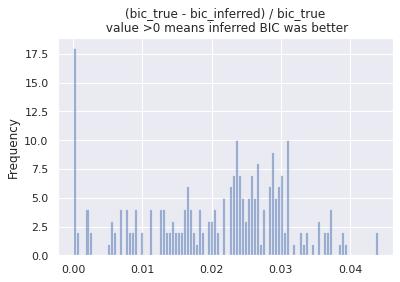

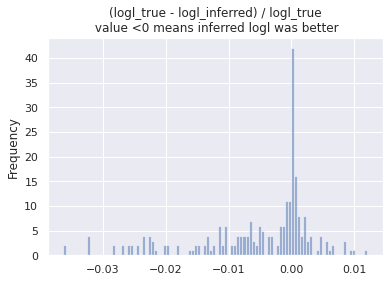

<Figure size 432x288 with 0 Axes>

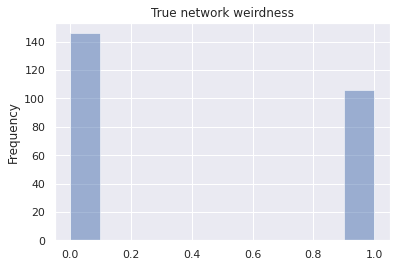

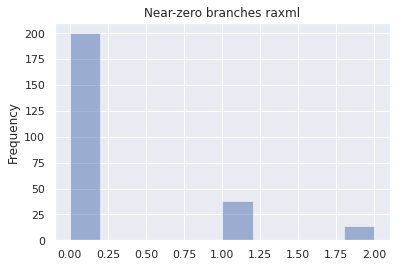

<Figure size 432x288 with 0 Axes>

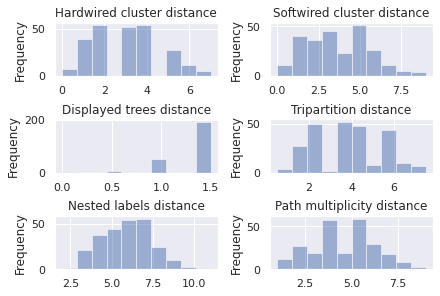

In [15]:
df_random_msasize_100 = df_random.query('(msa_size == 100) | (msa_size == 101)')
build_stats(df_random_msasize_100)

### Plots for LikelihodType.AVERAGE

Inferred BIC better or equal: 125
Inferred BIC worse: 1

Inferred loglh better or equal: 44
Inferred loglh worse: 82

Inferred n_reticulations less: 112
Inferred n_reticulations equal: 14
Inferred n_reticulations more: 0





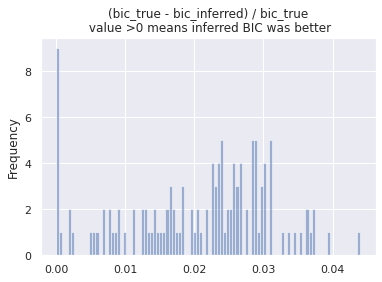

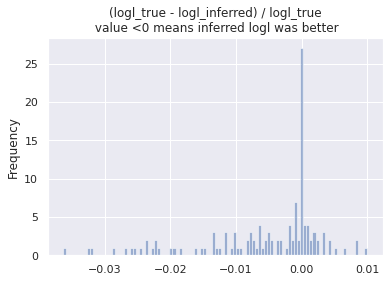

<Figure size 432x288 with 0 Axes>

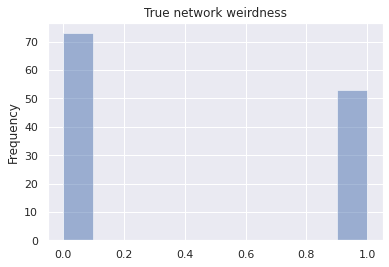

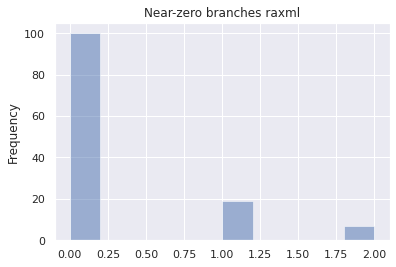

<Figure size 432x288 with 0 Axes>

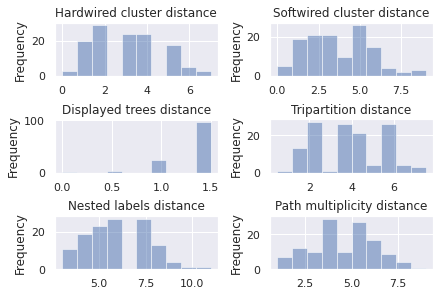

In [16]:
df_random_msasize_100_average = df_random_msasize_100.query('likelihood_type == "AVERAGE"')
build_stats(df_random_msasize_100_average)

### Plots for LikelihoodType.BEST

Inferred BIC better or equal: 126
Inferred BIC worse: 0

Inferred loglh better or equal: 52
Inferred loglh worse: 74

Inferred n_reticulations less: 112
Inferred n_reticulations equal: 14
Inferred n_reticulations more: 0





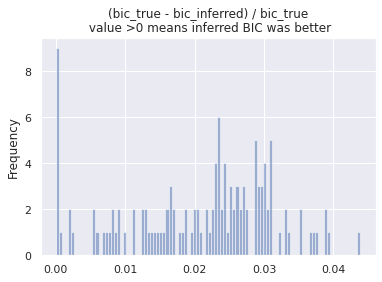

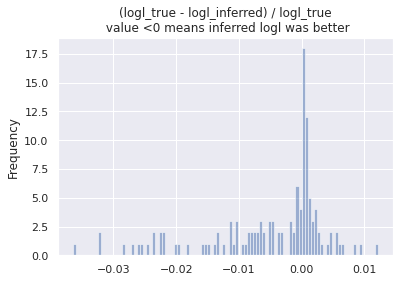

<Figure size 432x288 with 0 Axes>

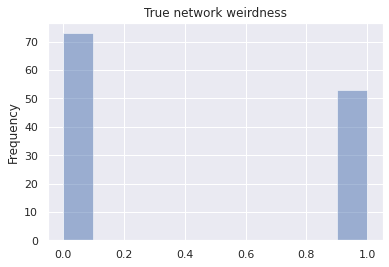

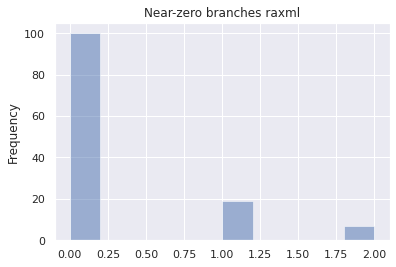

<Figure size 432x288 with 0 Axes>

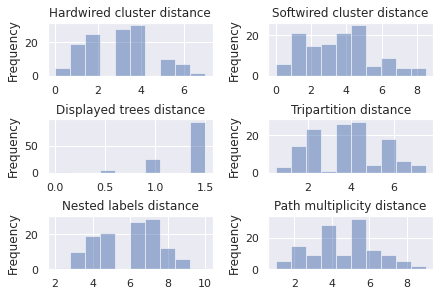

In [17]:
df_random_msasize_100_best = df_random_msasize_100.query('likelihood_type == "BEST"')
build_stats(df_random_msasize_100_best)

## Plots for MSA_size ~ 200*n_trees

Inferred BIC better or equal: 4
Inferred BIC worse: 0

Inferred loglh better or equal: 1
Inferred loglh worse: 3

Inferred n_reticulations less: 4
Inferred n_reticulations equal: 0
Inferred n_reticulations more: 0





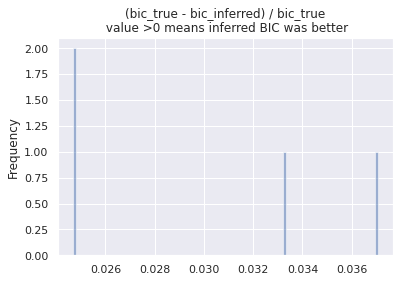

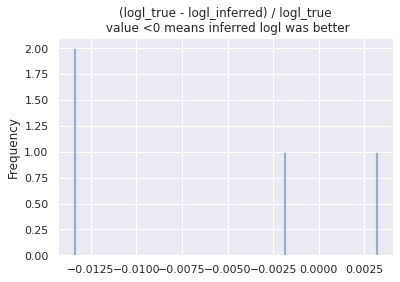

<Figure size 432x288 with 0 Axes>

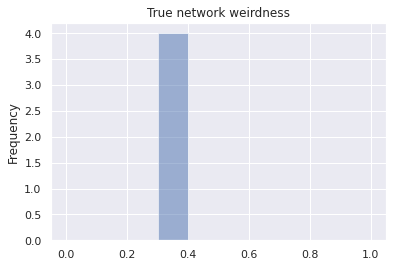

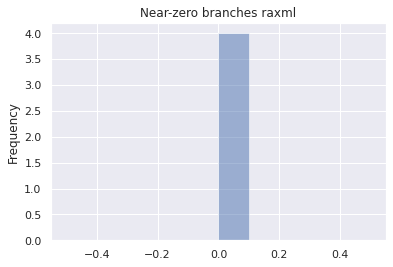

<Figure size 432x288 with 0 Axes>

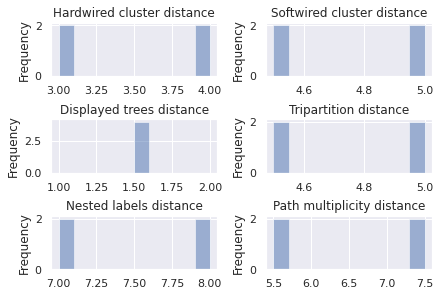

In [18]:
df_random_msasize_200 = df_random.query('(msa_size == 200) | (msa_size == 201)')
build_stats(df_random_msasize_200)

### Plots for LikelihodType.AVERAGE

Inferred BIC better or equal: 2
Inferred BIC worse: 0

Inferred loglh better or equal: 0
Inferred loglh worse: 2

Inferred n_reticulations less: 2
Inferred n_reticulations equal: 0
Inferred n_reticulations more: 0





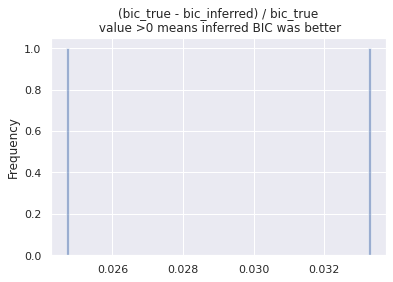

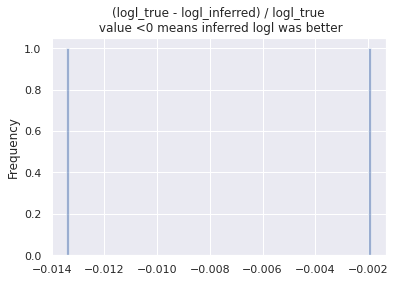

<Figure size 432x288 with 0 Axes>

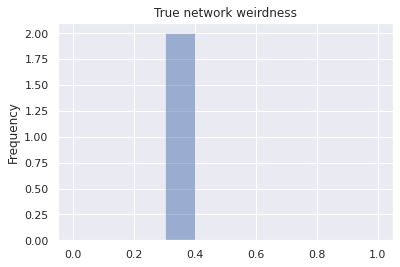

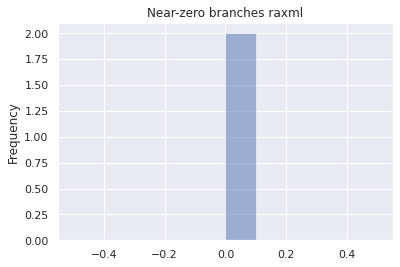

<Figure size 432x288 with 0 Axes>

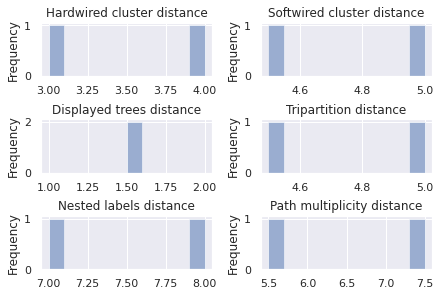

In [19]:
df_random_msasize_200_average = df_random_msasize_200.query('likelihood_type == "AVERAGE"')
build_stats(df_random_msasize_200_average)

### Plots for LikelihoodType.BEST

Inferred BIC better or equal: 2
Inferred BIC worse: 0

Inferred loglh better or equal: 1
Inferred loglh worse: 1

Inferred n_reticulations less: 2
Inferred n_reticulations equal: 0
Inferred n_reticulations more: 0





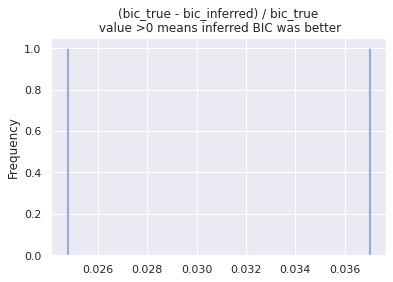

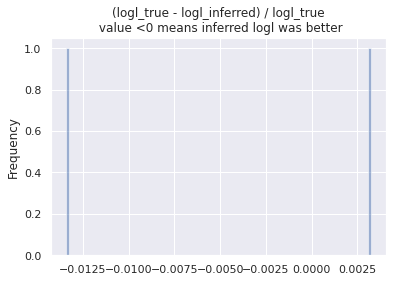

<Figure size 432x288 with 0 Axes>

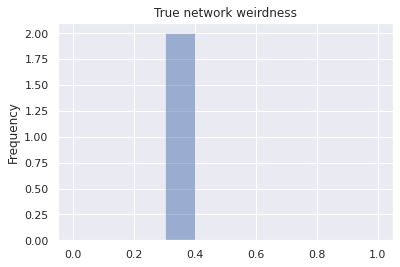

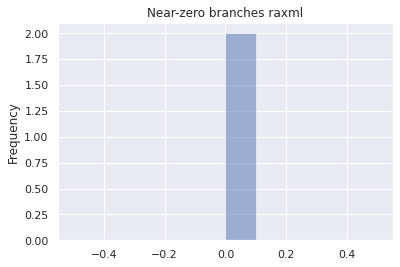

<Figure size 432x288 with 0 Axes>

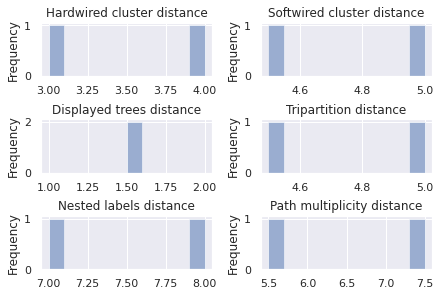

In [20]:
df_random_msasize_200_best = df_random_msasize_200.query('likelihood_type == "BEST"')
build_stats(df_random_msasize_200_best)